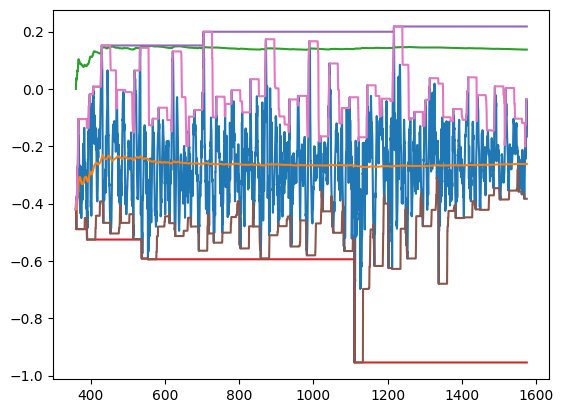

0


c:\Users\Pablo\AppData\Local\pypoetry\Cache\virtualenvs\deeprheoflow-python4ml-ZcKcJpwJ-py3.10\lib\site-packages\scipy\stats\_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

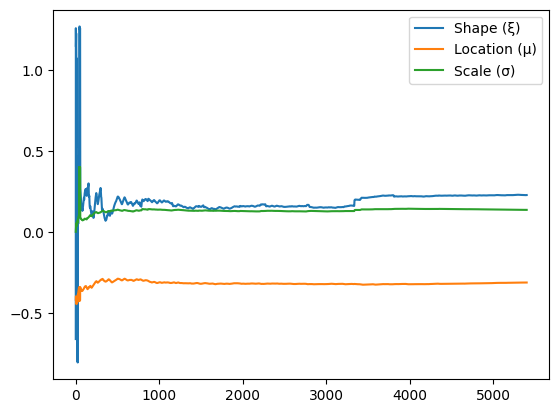

Time: 1 years, Exceedance Probability: 0.01, Extreme Value: 0.0730
Time: 1 years, Exceedance Probability: 0.05, Extreme Value: -0.0210
Time: 1 years, Exceedance Probability: 0.10, Extreme Value: -0.0749
Time: 10 years, Exceedance Probability: 0.01, Extreme Value: 0.1585
Time: 10 years, Exceedance Probability: 0.05, Extreme Value: 0.1027
Time: 10 years, Exceedance Probability: 0.10, Extreme Value: 0.0708
Time: 50 years, Exceedance Probability: 0.01, Extreme Value: 0.1966
Time: 50 years, Exceedance Probability: 0.05, Extreme Value: 0.1579
Time: 50 years, Exceedance Probability: 0.10, Extreme Value: 0.1357
Time: 100 years, Exceedance Probability: 0.01, Extreme Value: 0.2091
Time: 100 years, Exceedance Probability: 0.05, Extreme Value: 0.1761
Time: 100 years, Exceedance Probability: 0.10, Extreme Value: 0.1571


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('./time_series.csv')
time_arr = df["t"].to_numpy() 
probe_0 = df["0"].to_numpy()
plt.plot(time_arr, probe_0)

avg_arr = np.array([probe_0[:index+1].mean() for index, p in enumerate(probe_0)])
rms_arr = np.array([probe_0[:index+1].std() for index, p in enumerate(probe_0)])
min_arr = np.array([probe_0[:index+1].min() for index, p in enumerate(probe_0)])
max_arr = np.array([probe_0[:index+1].max() for index, p in enumerate(probe_0)])
min_lookback_arr = np.array([probe_0[max(0, index -100):index+1].min() for index, p in enumerate(probe_0)])
max_lookback_arr = np.array([probe_0[max(0, index -100):index+1].max() for index, p in enumerate(probe_0)])

plt.plot(time_arr, avg_arr)
plt.plot(time_arr, rms_arr)
plt.plot(time_arr, min_arr)
plt.plot(time_arr, max_arr)
plt.plot(time_arr, min_lookback_arr)
plt.plot(time_arr, max_lookback_arr)
plt.show()
plt.close()

def get_val(index):
    if index % 10 == 0:
        print(index) 
    return stats.genextreme.fit(probe_0[:index+1])

gev_params = np.array([get_val(index) for index in range(len(probe_0))])

plt.plot(gev_params[:,0], label="Shape (ξ)")
plt.plot(gev_params[:,1], label="Location (μ)")
plt.plot(gev_params[:,2], label="Scale (σ)")
plt.legend()
plt.show()

# # shape, loc, scale = stats.genextreme.fit(probe_0)
# print(f"Fitted GEV parameters:")
# print(f"Shape (ξ): {shape:.4f}")
# print(f"Location (μ): {loc:.4f}")
# print(f"Scale (σ): {scale:.4f}")

def calculate_extreme_value(time, exceedance_prob, shape, loc, scale):
    return_period = 1 / (1 - (1 - exceedance_prob) ** (1 / time))
    return_level = stats.genextreme.isf(1/return_period, shape, loc, scale)
    
    return return_level

times = [1, 10, 50, 100]  # Time periods in years
exceedance_probs = [0.01, 0.05, 0.1]  # Exceedance probabilities

for time in times:
    for prob in exceedance_probs:
        extreme_value = calculate_extreme_value(time, prob, gev_params[-1,0], gev_params[-1,1], gev_params[-1,2])
        print(f"Time: {time} years, Exceedance Probability: {prob:.2f}, Extreme Value: {extreme_value:.4f}")

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


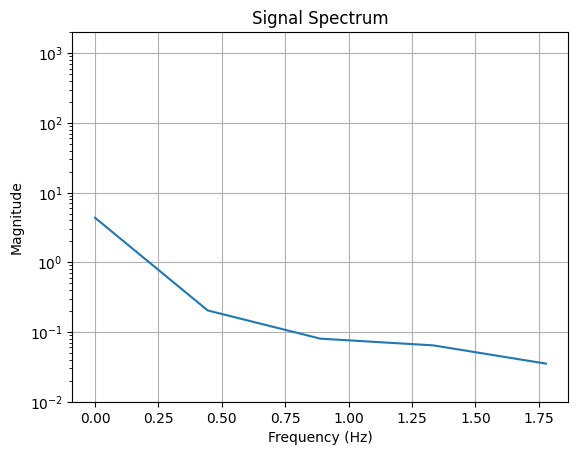

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.animation as animation

def compute_spectrum(time, signal):
    dt = time[1] - time[0]
    fs = 1 / dt
    n = len(signal)
    freq = np.fft.fftfreq(n, d=dt) 
    spectrum = np.fft.fft(signal)
    mask = freq >= 0
    return freq[mask], np.abs(spectrum[mask]) 

df = pd.read_csv('./time_series.csv')
time_arr = df["t"].to_numpy() 
probe_0 = df["0"].to_numpy()

freqs, mag = compute_spectrum(time_arr[:10], probe_0[:10])

# Plot the spectrum
# plt.figure(figsize=(8, 4))
# plt.semilogy(freqs, mag)  # Logarithmic scale for magnitude
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.title('Signal Spectrum')
# plt.grid()
# plt.show()


fig, ax = plt.subplots()
line, = ax.semilogy(freqs, mag)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
ax.set_ylim([0.01,2000])
ax.set_title('Signal Spectrum')
ax.grid()

i = 2

# Update function for animation
def update(frame):
    print(frame)
    freqs, mag = compute_spectrum(time_arr[:10 * frame + 10], probe_0[:10 * frame + 10])
    line.set_xdata(freqs)  # Shift sine wave
    line.set_ydata(mag)  # Shift sine wave
    return line,

# Create animation
n_frames = len(time_arr) // 10
ani = animation.FuncAnimation(fig, update, frames=n_frames, interval=30)

# Save animation as mp4
ani.save(filename="./ffmpeg_example.mp4", writer="ffmpeg")